# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Set date/time for charting
runTime = time.strftime("%m/%d/%Y", time.localtime())

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
latList = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngList = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(latList, lngList)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    cityName = city.city_name
    countryCode = city.country_code
    fullCity = cityName + "," + countryCode
    # If the city is unique, then add it to a our cities list
    if fullCity not in cities:
        cities.append(fullCity)

# Print the city count to confirm sufficient count
len(cities)


578

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

# Loop through the list of cities and perform request for data on each
cityWeather = []
cityList = []
countryList = []

searchCnt = 0
success = 0
failed = 0
print("Begin API Calls to OpenWeather.org")
print("---------------------------------------")
for fullCity in cities:
    searchCnt += 1
    print(f"Processing record {searchCnt} for the city: {fullCity}")   
    response = requests.get(query_url + fullCity).json()
    cityID = response.get("id")
    if response.get("id"):
        print(f"     Record found for city: {fullCity}    city id: {cityID}")
        cityWeather.append(response)
        citySplit = fullCity.split(",")
        cityList.append(citySplit[0])
        countryList.append(citySplit[1])
        success += 1
    else:
        print(f"     No weather record found for city: {fullCity}")
        failed += 1
          
print("---------------------------------------")
print("Data Retrieval Complete!")
print(f"Retrieved {success} out of {searchCnt} successfully!")

Begin API Calls to OpenWeather.org
---------------------------------------
Processing record 1 for the city: namibe,ao
     Record found for city: namibe,ao    city id: 3347019
Processing record 2 for the city: bubaque,gw
     Record found for city: bubaque,gw    city id: 2374583
Processing record 3 for the city: hailar,cn
     Record found for city: hailar,cn    city id: 2037078
Processing record 4 for the city: albany,au
     Record found for city: albany,au    city id: 2077963
Processing record 5 for the city: busselton,au
     Record found for city: busselton,au    city id: 2075265
Processing record 6 for the city: fallon,us
     Record found for city: fallon,us    city id: 5681948
Processing record 7 for the city: hay river,ca
     Record found for city: hay river,ca    city id: 5972762
Processing record 8 for the city: port macquarie,au
     Record found for city: port macquarie,au    city id: 2152659
Processing record 9 for the city: bluff,nz
     Record found for city: bluff,nz

     Record found for city: myitkyina,mm    city id: 1307741
Processing record 79 for the city: tocopilla,cl
     Record found for city: tocopilla,cl    city id: 3869716
Processing record 80 for the city: taltal,cl
     Record found for city: taltal,cl    city id: 3870243
Processing record 81 for the city: castro,cl
     Record found for city: castro,cl    city id: 3896218
Processing record 82 for the city: lagoa,pt
     Record found for city: lagoa,pt    city id: 2267254
Processing record 83 for the city: the valley,ai
     Record found for city: the valley,ai    city id: 3573374
Processing record 84 for the city: chuy,uy
     Record found for city: chuy,uy    city id: 3443061
Processing record 85 for the city: rocha,uy
     Record found for city: rocha,uy    city id: 3440777
Processing record 86 for the city: tiarei,pf
     Record found for city: tiarei,pf    city id: 4033356
Processing record 87 for the city: leningradskiy,ru
     Record found for city: leningradskiy,ru    city id: 

     Record found for city: provideniya,ru    city id: 4031574
Processing record 156 for the city: makakilo city,us
     Record found for city: makakilo city,us    city id: 5850554
Processing record 157 for the city: macaboboni,ph
     No weather record found for city: macaboboni,ph
Processing record 158 for the city: tiksi,ru
     Record found for city: tiksi,ru    city id: 2015306
Processing record 159 for the city: tuktoyaktuk,ca
     Record found for city: tuktoyaktuk,ca    city id: 6170031
Processing record 160 for the city: oussouye,sn
     Record found for city: oussouye,sn    city id: 2246901
Processing record 161 for the city: sao gabriel da cachoeira,br
     Record found for city: sao gabriel da cachoeira,br    city id: 3662342
Processing record 162 for the city: deputatskiy,ru
     Record found for city: deputatskiy,ru    city id: 2028164
Processing record 163 for the city: lorengau,pg
     Record found for city: lorengau,pg    city id: 2092164
Processing record 164 for the 

     Record found for city: hohhot,cn    city id: 2036892
Processing record 233 for the city: verkhnevilyuysk,ru
     Record found for city: verkhnevilyuysk,ru    city id: 2013639
Processing record 234 for the city: pangnirtung,ca
     Record found for city: pangnirtung,ca    city id: 6096551
Processing record 235 for the city: phan rang,vn
     No weather record found for city: phan rang,vn
Processing record 236 for the city: aguimes,es
     Record found for city: aguimes,es    city id: 2522325
Processing record 237 for the city: awjilah,ly
     Record found for city: awjilah,ly    city id: 88533
Processing record 238 for the city: yellowknife,ca
     Record found for city: yellowknife,ca    city id: 6185377
Processing record 239 for the city: halalo,wf
     No weather record found for city: halalo,wf
Processing record 240 for the city: marystown,ca
     Record found for city: marystown,ca    city id: 6067472
Processing record 241 for the city: haines junction,ca
     Record found for

     Record found for city: bage,br    city id: 3471196
Processing record 310 for the city: esperanza,ph
     Record found for city: esperanza,ph    city id: 1713788
Processing record 311 for the city: karaman,tr
     Record found for city: karaman,tr    city id: 309527
Processing record 312 for the city: vestmanna,fo
     Record found for city: vestmanna,fo    city id: 2610343
Processing record 313 for the city: klaksvik,fo
     Record found for city: klaksvik,fo    city id: 2618795
Processing record 314 for the city: beloha,mg
     Record found for city: beloha,mg    city id: 1067565
Processing record 315 for the city: alyangula,au
     Record found for city: alyangula,au    city id: 2079582
Processing record 316 for the city: palana,ru
     Record found for city: palana,ru    city id: 2122262
Processing record 317 for the city: egersund,no
     Record found for city: egersund,no    city id: 3158792
Processing record 318 for the city: gavle,se
     Record found for city: gavle,se    

     Record found for city: grenville,gd    city id: 3580236
Processing record 386 for the city: ahuimanu,us
     Record found for city: ahuimanu,us    city id: 5856516
Processing record 387 for the city: shimoda,jp
     Record found for city: shimoda,jp    city id: 1852357
Processing record 388 for the city: sola,vu
     Record found for city: sola,vu    city id: 2134814
Processing record 389 for the city: labuan,my
     Record found for city: labuan,my    city id: 1734240
Processing record 390 for the city: irosin,ph
     Record found for city: irosin,ph    city id: 1710532
Processing record 391 for the city: mikhaylovskoye,ru
     Record found for city: mikhaylovskoye,ru    city id: 526749
Processing record 392 for the city: fresno,us
     Record found for city: fresno,us    city id: 5350937
Processing record 393 for the city: merrill,us
     Record found for city: merrill,us    city id: 5572979
Processing record 394 for the city: kamenskoye,ru
     No weather record found for city:

     Record found for city: husavik,is    city id: 2629833
Processing record 462 for the city: lodwar,ke
     Record found for city: lodwar,ke    city id: 189280
Processing record 463 for the city: talnakh,ru
     Record found for city: talnakh,ru    city id: 1490256
Processing record 464 for the city: mahon,es
     No weather record found for city: mahon,es
Processing record 465 for the city: svit,sk
     Record found for city: svit,sk    city id: 723411
Processing record 466 for the city: hamilton,bm
     Record found for city: hamilton,bm    city id: 3573197
Processing record 467 for the city: chipinge,zw
     Record found for city: chipinge,zw    city id: 893549
Processing record 468 for the city: nieuw nickerie,sr
     Record found for city: nieuw nickerie,sr    city id: 3383427
Processing record 469 for the city: bandarbeyla,so
     Record found for city: bandarbeyla,so    city id: 64814
Processing record 470 for the city: mabaruma,gy
     Record found for city: mabaruma,gy    ci

     No weather record found for city: laguna,br
Processing record 539 for the city: wagga wagga,au
     Record found for city: wagga wagga,au    city id: 2145110
Processing record 540 for the city: bambous virieux,mu
     Record found for city: bambous virieux,mu    city id: 1106677
Processing record 541 for the city: belyy yar,ru
     Record found for city: belyy yar,ru    city id: 1510377
Processing record 542 for the city: tomatlan,mx
     Record found for city: tomatlan,mx    city id: 3981391
Processing record 543 for the city: rakitovo,bg
     Record found for city: rakitovo,bg    city id: 727801
Processing record 544 for the city: keetmanshoop,na
     Record found for city: keetmanshoop,na    city id: 3356264
Processing record 545 for the city: punta alta,ar
     Record found for city: punta alta,ar    city id: 3429886
Processing record 546 for the city: sorland,no
     Record found for city: sorland,no    city id: 3137469
Processing record 547 for the city: deder,et
     Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
lats = [result["coord"]["lat"] for result in cityWeather]
lngs = [result["coord"]["lon"] for result in cityWeather]
maxTemps = [result["main"]["temp"] for result in cityWeather]
humids = [result["main"]["humidity"] for result in cityWeather]
clouds =[result["clouds"]["all"] for result in cityWeather]
winds = [result["wind"]["speed"] for result in cityWeather]
dates = [result["dt"] for result in cityWeather]
weatherStates = [result["weather"][0]["main"] for result in cityWeather]

print (f"City      {len(cityList)}")
print (f"Cloudiness      {len(clouds)}")
print (f"Country      {len(countryList)}")
print (f"Date      {len(dates)}")
print (f"Humidity      {len(humids)}")
print (f"Lat      {len(lats)}")
print (f"Long      {len(lngs)}")
print (f"Max Temp      {len(maxTemps)}")
print (f"Wind Speed      {len(winds)}")
print (f"Weather      {len(weatherStates)}")

City      508
Cloudiness      508
Country      508
Date      508
Humidity      508
Lat      508
Long      508
Max Temp      508
Wind Speed      508
Weather      508


In [5]:
weatherData = pd.DataFrame({"City":cityList,
                             "Cloudiness":clouds,
                            "Country":countryList,
                             "Date":dates,
                             "Humidity":humids,
                            "Lat":lats,
                            "Lng":lngs,
                            "Max Temp":maxTemps,
                            "Wind Speed":winds,
                           "Weather":weatherStates})

weatherData.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Weather
0,namibe,0,ao,1554438808,100,-15.19,12.15,77.46,5.97,Clear
1,bubaque,76,gw,1554438808,90,11.28,-15.83,80.34,15.03,Clouds
2,hailar,56,cn,1554438809,37,49.20,119.70,41.64,12.57,Clouds
3,albany,75,au,1554433200,58,-35.02,117.88,59.00,8.05,Clouds
4,busselton,0,au,1554438312,27,-33.64,115.35,66.90,7.52,Clear


In [6]:
#Set colors that will be used on plots, based on the weather condition groups. Any value not specified is considered "Other"
col = np.where(weatherData["Weather"]=="Thunderstorm",'purple',
               np.where(weatherData["Weather"]=="Drizzle",'blue',
                        np.where(weatherData["Weather"]=="Rain",'darkblue',
                                 np.where(weatherData["Weather"]=="Snow",'snow',
                                          np.where(weatherData["Weather"]=="Clear",'skyblue',
                                                   np.where(weatherData["Weather"]=="Clouds",'darkgrey','tan'))))))
#List the unique weather condition groups
weatherData["Weather"].unique()

array(['Clear', 'Clouds', 'Rain', 'Snow', 'Mist', 'Haze', 'Fog', 'Smoke',
       'Dust'], dtype=object)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

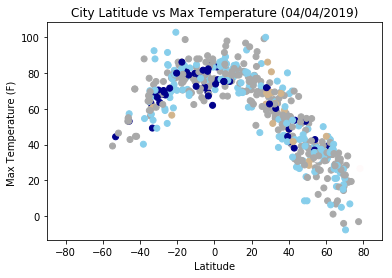

In [13]:
# Build a scatter plot for each data type

#col = np.where(weatherData["Lng"]>0,'r',np.where(weatherData["Lng"]<0,'b','k'))

# Latitude vs Max Temp
plt.scatter(weatherData["Lat"], weatherData["Max Temp"], color=col, marker='o')

# Add chart labels
plt.title(f"City Latitude vs Max Temperature ({runTime})")
plt.ylabel("Max Temperature (F) ")
plt.xlabel("Latitude")
plt.grid
plt.xlim(-90,90)

# Save the figure
plt.savefig("Latitude_vs_MaxTemp.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

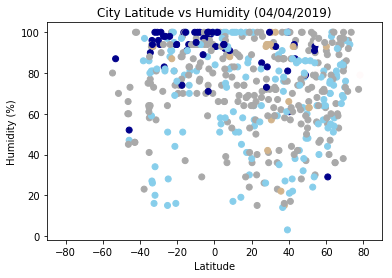

In [10]:
# Build a scatter plot for each data type

# Latitude vs Humidity
plt.scatter(weatherData["Lat"], weatherData["Humidity"], color=col, marker="o")

# Add chart labels
plt.title(f"City Latitude vs Humidity ({runTime})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid
plt.xlim(-90,90)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

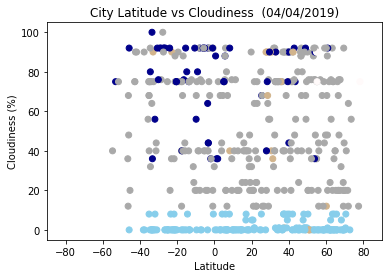

In [11]:
# Latitude vs Cloudiness
plt.scatter(weatherData["Lat"], weatherData["Cloudiness"], color=col, marker="o")

# Add chart labels
plt.title(f"City Latitude vs Cloudiness  ({runTime})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid
plt.xlim(-90,90)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

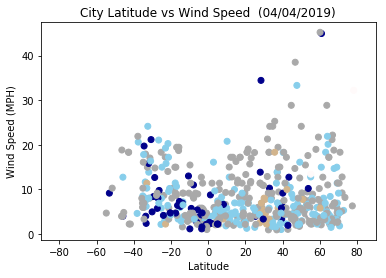

In [12]:
# Latitude vs Wind Speed
plt.scatter(weatherData["Lat"], weatherData["Wind Speed"], color=col, marker="o")

# Add chart labels
plt.title(f"City Latitude vs Wind Speed  ({runTime})")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid
plt.xlim(-90,90)

# Save the figure
plt.savefig("Latitude_vs_WindSpeed.png")
# Show plot
plt.show()